In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pandas import read_csv
from pandas import concat
from pandas import DataFrame

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

import scipy.stats

C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
glucose_series_pat1 = pd.read_csv("./data/CGMSeriesLunchPat1.csv")
glucose_series_pat1.head()

glucose_series_pat2 = pd.read_csv("./data/CGMSeriesLunchPat2.csv")
glucose_series_pat2.head()

glucose_series_pat3 = pd.read_csv("./data/CGMSeriesLunchPat3.csv")
glucose_series_pat3.head()

glucose_series_pat4 = pd.read_csv("./data/CGMSeriesLunchPat4.csv")
glucose_series_pat4.head()

glucose_series_pat5 = pd.read_csv("./data/CGMSeriesLunchPat5.csv")
glucose_series_pat5.head()


,cgmSeries_ 1,cgmSeries_ 2,cgmSeries_ 3,cgmSeries_ 4,cgmSeries_ 5,cgmSeries_ 6,cgmSeries_ 7,cgmSeries_ 8,cgmSeries_ 9,cgmSeries_10,...,cgmSeries_22,cgmSeries_23,cgmSeries_24,cgmSeries_25,cgmSeries_26,cgmSeries_27,cgmSeries_28,cgmSeries_29,cgmSeries_30,cgmSeries_31
0,254,258,261.0,261.0,257.0,254.0,248.0,242.0,237.0,231.0,...,144.0,135.0,116.0,92.0,79.0,72,76,88,116,NaN
1,192,200,206.0,211.0,193.0,185.0,181.0,173.0,175.0,179.0,...,143.0,152.0,163.0,179.0,176.0,170,168,176,182,NaN
2,324,322,323.0,316.0,312.0,309.0,308.0,303.0,301.0,296.0,...,232.0,226.0,221.0,214.0,212.0,201,178,167,160,NaN
3,388,384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,299,292,283,302,NaN
4,354,344,340.0,338.0,334.0,335.0,328.0,318.0,310.0,302.0,...,220.0,220.0,217.0,213.0,216.0,211,202,199,195,NaN


In [236]:
time_stamp = pd.read_csv("./data/CGMDatenumLunchPat1.csv")
time_stamp = time_stamp.applymap(lambda i : pd.to_datetime(i - 719529, unit='D'))
time_stamp.head(6)

,cgmDatenum_ 1,cgmDatenum_ 2,cgmDatenum_ 3,cgmDatenum_ 4,cgmDatenum_ 5,cgmDatenum_ 6,cgmDatenum_ 7,cgmDatenum_ 8,cgmDatenum_ 9,cgmDatenum_10,...,cgmDatenum_22,cgmDatenum_23,cgmDatenum_24,cgmDatenum_25,cgmDatenum_26,cgmDatenum_27,cgmDatenum_28,cgmDatenum_29,cgmDatenum_30,cgmDatenum_31
0,2018-06-14 14:01:10.992000000,2018-06-14 13:56:11.011199999,2018-06-14 13:51:11.030400,2018-06-14 13:46:10.963200,2018-06-14 13:41:10.982400000,2018-06-14 13:36:11.001600000,2018-06-14 13:31:11.020800,2018-06-14 13:26:11.040000,2018-06-14 13:21:10.972800000,2018-06-14 13:16:10.992000000,...,2018-06-14 12:16:10.963200,2018-06-14 12:11:10.982400000,2018-06-14 12:06:11.001600,2018-06-14 12:01:11.020800,2018-06-14 11:56:11.040000,2018-06-14 11:51:10.972800,2018-06-14 11:46:10.992000000,2018-06-14 11:41:11.011200,2018-06-14 11:36:11.030400,2018-06-14 11:31:10.963200
1,2018-06-06 15:04:00.019199999,2018-06-06 14:59:00.038400000,2018-06-06 14:53:59.971200,2018-06-06 14:48:59.990400,2018-06-06 14:44:00.009600000,2018-06-06 14:39:00.028800000,2018-06-06 14:33:59.961600,2018-06-06 14:28:59.980800,2018-06-06 14:24:00.000000000,2018-06-06 14:19:00.019199999,...,2018-06-06 13:18:59.990400,2018-06-06 13:14:00.009600000,2018-06-06 13:09:00.028800,2018-06-06 13:03:59.961600,2018-06-06 12:58:59.980800,2018-06-06 12:54:00.000000,2018-06-06 12:49:00.019199999,2018-06-06 12:44:00.038400,2018-06-06 12:38:59.971200,NaT
2,2018-06-05 13:13:53.961600000,2018-06-05 13:08:53.980800000,2018-06-05 13:03:54.000000,2018-06-05 12:58:54.019200,2018-06-05 12:53:54.038400000,2018-06-05 12:48:53.971200000,2018-06-05 12:43:53.990400,2018-06-05 12:38:54.009600,2018-06-05 12:33:54.028799999,2018-06-05 12:28:53.961600000,...,2018-06-05 11:28:54.019200,2018-06-05 11:23:54.038400000,2018-06-05 11:18:53.971200,2018-06-05 11:13:53.990400,2018-06-05 11:08:54.009600,2018-06-05 11:03:54.028800,2018-06-05 10:58:53.961600000,2018-06-05 10:53:53.980800,2018-06-05 10:48:54.000000,NaT
3,2018-06-04 13:43:49.008000000,2018-06-04 13:38:49.027200000,2018-06-04 13:33:48.960000,2018-06-04 13:28:48.979200,2018-06-04 13:23:48.998400000,2018-06-04 13:18:49.017599999,2018-06-04 13:13:49.036800,2018-06-04 13:08:48.969600,2018-06-04 13:03:48.988800000,2018-06-04 12:58:49.008000000,...,2018-06-04 11:58:48.979200,2018-06-04 11:53:48.998400000,2018-06-04 11:48:49.017600,2018-06-04 11:43:49.036800,2018-06-04 11:38:48.969600,2018-06-04 11:33:48.988800,2018-06-04 11:28:49.008000000,2018-06-04 11:23:49.027200,2018-06-04 11:18:48.960000,2018-06-04 11:13:48.979200
4,2018-05-21 14:08:45.024000000,2018-05-21 14:03:45.043200000,2018-05-21 13:58:44.976000,2018-05-21 13:53:44.995200,2018-05-21 13:48:45.014399999,2018-05-21 13:43:45.033600000,2018-05-21 13:38:44.966400,2018-05-21 13:33:44.985600,2018-05-21 13:28:45.004800000,2018-05-21 13:23:45.024000000,...,2018-05-21 12:23:44.995200,2018-05-21 12:18:45.014399999,2018-05-21 12:13:45.033600,2018-05-21 12:08:44.966400,2018-05-21 12:03:44.985600,2018-05-21 11:58:45.004800,2018-05-21 11:53:45.024000000,2018-05-21 11:48:45.043200,2018-05-21 11:43:44.976000,NaT
5,2018-05-16 14:34:42.038400000,2018-05-16 14:29:41.971200000,2018-05-16 14:24:41.990400,2018-05-16 14:19:42.009600,2018-05-16 14:14:42.028800000,2018-05-16 14:09:39.974400000,2018-05-16 14:04:39.993600,2018-05-16 13:59:40.012800,2018-05-16 13:54:40.032000000,2018-05-16 13:49:39.964800000,...,2018-05-16 12:49:40.022400,2018-05-16 12:44:40.041600000,2018-05-16 12:39:39.974400,2018-05-16 12:34:39.993600,2018-05-16 12:29:40.012800,2018-05-16 12:24:40.032000,2018-05-16 12:19:39.964800000,2018-05-16 12:14:39.984000,2018-05-16 12:09:40.003200,2018-05-16 12:04:40.022400


In [237]:
#arranging the cgm_series data in order of time
columns = glucose_series_pat1.columns.tolist()
columns = columns[::-1]
glucose_series_sorted_pat1 = glucose_series_pat1[columns]

columns = glucose_series_pat2.columns.tolist()
columns = columns[::-1]
glucose_series_sorted_pat2 = glucose_series_pat2[columns]

columns = glucose_series_pat3.columns.tolist()
columns = columns[::-1]
glucose_series_sorted_pat3 = glucose_series_pat3[columns]

columns = glucose_series_pat4.columns.tolist()
columns = columns[::-1]
glucose_series_sorted_pat4 = glucose_series_pat4[columns]

columns = glucose_series_pat5.columns.tolist()
columns = columns[::-1]
glucose_series_sorted_pat5 = glucose_series_pat5[columns]

In [238]:
#data cleaning
def dataCleaning(df):
    glucose_cols = df.columns
    velo_data_temp = pd.DataFrame(columns = glucose_cols)
    velo_data = velo_data_temp.append(df, ignore_index = False)
    df.fillna(df.mean(),inplace=True)
    return velo_data, df

velo_data_pat1, cleaned_CGM_pat1 = dataCleaning(glucose_series_sorted_pat1)
velo_data_pat2, cleaned_CGM_pat2 = dataCleaning(glucose_series_sorted_pat2)
velo_data_pat3, cleaned_CGM_pat3 = dataCleaning(glucose_series_sorted_pat3)
velo_data_pat4, cleaned_CGM_pat4 = dataCleaning(glucose_series_sorted_pat4)
velo_data_pat5, cleaned_CGM_pat5 = dataCleaning(glucose_series_sorted_pat5)

C:\Users\pc\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [239]:
#feature extraction: Feature1:- Autocorrelation
def autocorrelation(x):
    result = np.correlate(x, x, mode='full')
    return result[:result.size//2]

def df_autocorrelation(df):
    rows,columns = df.shape
    corr_matrix=[]
    for i in range(rows):
        result = autocorrelation(df.iloc[i])
        reverse_result = np.flipud(result)
        corr_matrix.append(reverse_result/reverse_result.max())
    return corr_matrix

feature_one = df_autocorrelation(cleaned_CGM_pat1)
auto_corr_pat1 = pd.DataFrame(feature_one)

feature_one = df_autocorrelation(cleaned_CGM_pat2)
auto_corr_pat2 = pd.DataFrame(feature_one)

feature_one = df_autocorrelation(cleaned_CGM_pat3)
auto_corr_pat3 = pd.DataFrame(feature_one)

feature_one = df_autocorrelation(cleaned_CGM_pat4)
auto_corr_pat4 = pd.DataFrame(feature_one)

feature_one = df_autocorrelation(cleaned_CGM_pat5)
auto_corr_pat5 = pd.DataFrame(feature_one)

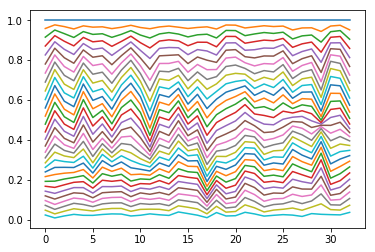

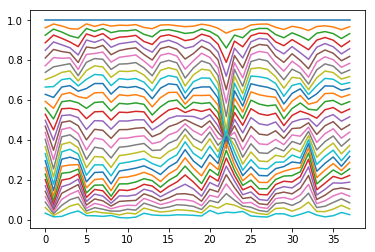

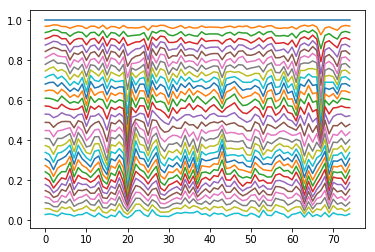

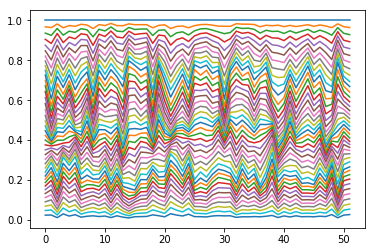

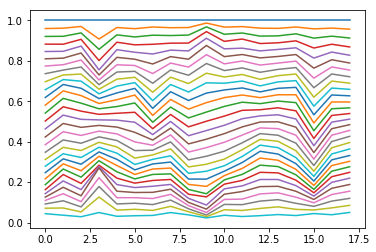

In [240]:
#autocorrelation analysis
def plot_curve(df):
    rows = df.shape[0]
    for i in range(rows):
        plt.plot(df.iloc[i,::3])
    plt.show()

plt.plot(auto_corr_pat1)
plt.show()
plt.plot(auto_corr_pat2)
plt.show()
plt.plot(auto_corr_pat3)
plt.show()
plt.plot(auto_corr_pat4)
plt.show()
plt.plot(auto_corr_pat5)
plt.show()

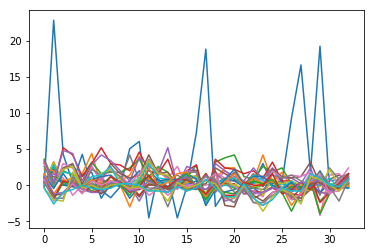

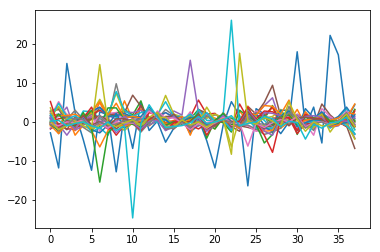

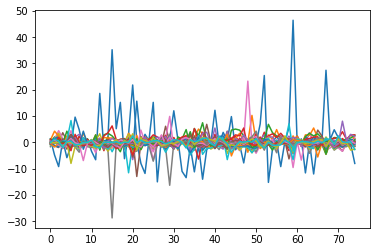

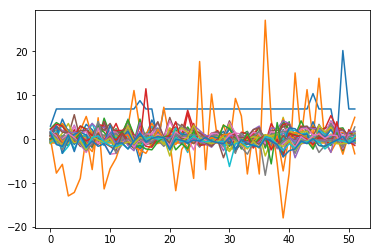

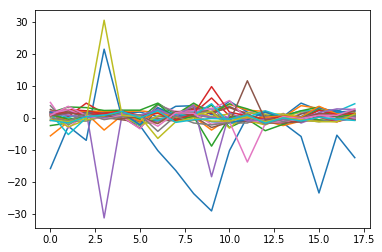

In [241]:
#rate of change of glucose level every 2 intervals
def row_velocity(record):
    result=[]
    cols = record.shape[0]
    for j in range(cols - 1):
        calc_velocity = (record[j+1] - record[j])/5
        result.append(calc_velocity)
    return result

def velocity_of_df(df):
    row,cols = df.shape
    vel_matrix=[]
    for i in range(row):
        row_vel = row_velocity(df.iloc[i])
        vel_matrix.append(row_vel)
    return vel_matrix
        
feature_two = velocity_of_df(cleaned_CGM_pat1)
velocity_pat1 = pd.DataFrame(feature_two)

feature_two = velocity_of_df(cleaned_CGM_pat2)
velocity_pat2 = pd.DataFrame(feature_two)

feature_two = velocity_of_df(cleaned_CGM_pat3)
velocity_pat3 = pd.DataFrame(feature_two)

feature_two = velocity_of_df(cleaned_CGM_pat4)
velocity_pat4 = pd.DataFrame(feature_two)

feature_two = velocity_of_df(cleaned_CGM_pat5)
velocity_pat5 = pd.DataFrame(feature_two)

plt.plot(velocity_pat1)
plt.show()
plt.plot(velocity_pat2)
plt.show()
plt.plot(velocity_pat3)
plt.show()
plt.plot(velocity_pat4)
plt.show()
plt.plot(velocity_pat5)
plt.show()

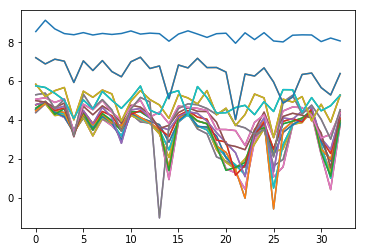

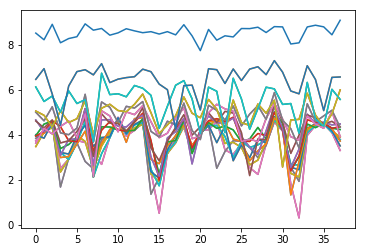

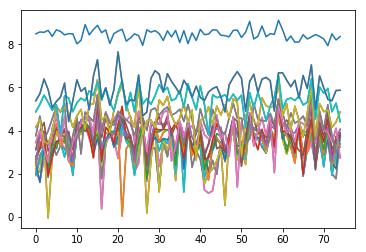

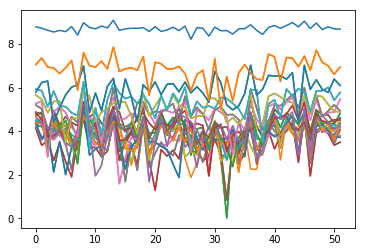

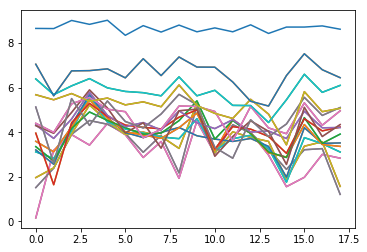

In [242]:
def row_fft(record):
    result=[]
    cols = record.shape[0]
    result = scipy.fftpack.fft(record)
    result = np.log(np.abs(result))
    return result

def fft_of_df(df):
    row,cols = df.shape
    fft_matrix=[]
    for i in range(row):
        row_fftransform = row_fft(df.iloc[i])
        fft_matrix.append(row_fftransform)
    return fft_matrix

feature_three = fft_of_df(cleaned_CGM_pat1)
fft_pat1 = pd.DataFrame(feature_three)

feature_three = fft_of_df(cleaned_CGM_pat2)
fft_pat2 = pd.DataFrame(feature_three)

feature_three = fft_of_df(cleaned_CGM_pat3)
fft_pat3 = pd.DataFrame(feature_three)

feature_three = fft_of_df(cleaned_CGM_pat4)
fft_pat4 = pd.DataFrame(feature_three)

feature_three = fft_of_df(cleaned_CGM_pat5)
fft_pat5 = pd.DataFrame(feature_three)

plt.plot(fft_pat1)
plt.show()
plt.plot(fft_pat2)
plt.show()
plt.plot(fft_pat3)
plt.show()
plt.plot(fft_pat4)
plt.show()
plt.plot(fft_pat5)
plt.show()

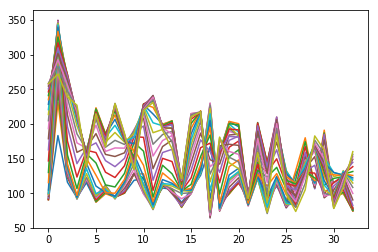

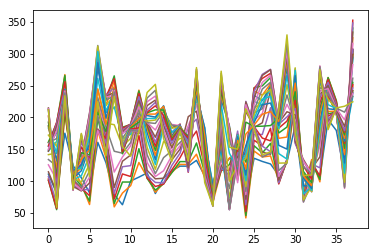

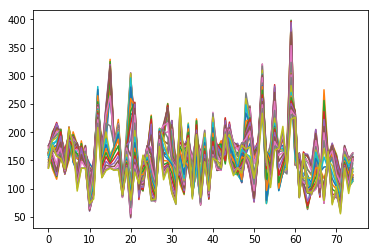

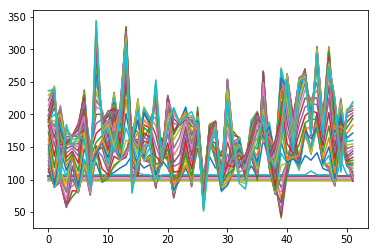

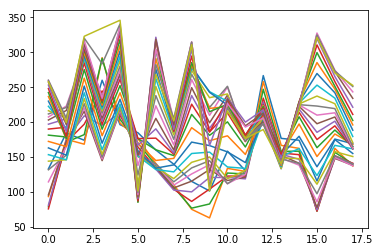

In [243]:
#Moving average:ma
def row_ma(record):
    result=[]
    cols = record.shape[0]
    windowSize = 3
    for i in range(cols-windowSize+1):
        mean = np.mean(record[i:i+windowSize])
        result.append(mean)
    return result

def ma_of_df(df):
    row,cols = df.shape
    ma_matrix=[]
    for i in range(row):
        row_movavg = row_ma(df.iloc[i])
        ma_matrix.append(row_movavg)
    return ma_matrix

feature_four = ma_of_df(cleaned_CGM_pat1)
ma_pat1 = pd.DataFrame(feature_four)

feature_four = ma_of_df(cleaned_CGM_pat2)
ma_pat2 = pd.DataFrame(feature_four)

feature_four = ma_of_df(cleaned_CGM_pat3)
ma_pat3 = pd.DataFrame(feature_four)

feature_four = ma_of_df(cleaned_CGM_pat4)
ma_pat4 = pd.DataFrame(feature_four)

feature_four = ma_of_df(cleaned_CGM_pat5)
ma_pat5 = pd.DataFrame(feature_four)

plt.plot(ma_pat1)
plt.show()
plt.plot(ma_pat2)
plt.show()
plt.plot(ma_pat3)
plt.show()
plt.plot(ma_pat4)
plt.show()
plt.plot(ma_pat5)
plt.show()

In [244]:
#feature matrix
df1 = auto_corr_pat1.T
df2 = velocity_pat1.T
df3 = fft_pat1.T
df4 = ma_pat1.T
featureMatrix_pat1 = df1.append([df2,df3,df4], ignore_index=True)
featureMatrix_pat1 = featureMatrix_pat1.T


df1 = auto_corr_pat2.T
df2 = velocity_pat2.T
df3 = fft_pat2.T
df4 = ma_pat2.T
featureMatrix_pat2 = df1.append([df2,df3,df4], ignore_index=True)
featureMatrix_pat2= featureMatrix_pat2.T

df1 = auto_corr_pat3.T
df2 = velocity_pat3.T
df3 = fft_pat3.T
df4 = ma_pat3.T
featureMatrix_pat3 = df1.append([df2,df3,df4], ignore_index=True)
featureMatrix_pat3 = featureMatrix_pat3.T

df1 = auto_corr_pat4.T
df2 = velocity_pat4.T
df3 = fft_pat4.T
df4 = ma_pat4.T

featureMatrix_pat4 = df1.append([df2,df3,df4], ignore_index=True)
featureMatrix_pat4 = featureMatrix_pat4.T

df1 = auto_corr_pat5.T
df2 = velocity_pat5.T
df3 = fft_pat5.T
df4 = ma_pat5.T

featureMatrix_pat5 = df1.append([df2,df3,df4], ignore_index=True)
featureMatrix_pat5 = featureMatrix_pat5.T

featureMatrix_pat1.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,1.0,0.958655,0.915175,0.870791,0.826055,0.780690,0.735330,0.690181,0.645642,0.602391,...,220.666667,228.333333,235.000000,241.000000,246.333333,250.666667,254.666667,257.333333,258.666667,258.000000
1,1.0,0.976842,0.951032,0.922750,0.892110,0.859873,0.826120,0.790490,0.752720,0.713152,...,343.000000,339.666667,333.666667,325.333333,317.000000,309.666667,301.666667,292.666667,282.666667,272.000000
2,1.0,0.968162,0.932840,0.894653,0.854322,0.811996,0.768054,0.723892,0.679816,0.636179,...,257.666667,264.333333,268.666667,271.333333,271.333333,268.666667,263.000000,256.000000,247.333333,239.000000
3,1.0,0.956404,0.913716,0.871550,0.828458,0.784444,0.740195,0.696786,0.653099,0.610411,...,204.000000,208.000000,209.666667,212.000000,213.333333,214.333333,215.333333,217.666667,223.000000,227.000000
4,1.0,0.971888,0.943231,0.913965,0.883176,0.851184,0.818532,0.785480,0.752121,0.717225,...,159.666667,158.333333,157.333333,156.333333,154.666667,151.333333,146.666667,142.333333,139.000000,137.666667


In [245]:
def pca_analysis(df):
    scaled_df=StandardScaler().fit_transform(df)
    pca = PCA(n_components=5)
    principalComponents = pca.fit_transform(scaled_df)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2',
                                                                      'principal component 3','principal component 4',
                                                                      'principal component 5'])
    #a=pca.components_
    #print(a)
    #variance=pca.explained_variance_
    return principalDf, pca

DF_pat1,pca_1 = pca_analysis(featureMatrix_pat1)
featureMatrix_pat2.fillna(0, inplace = True)
DF_pat2,pca_2 = pca_analysis(featureMatrix_pat2)
featureMatrix_pat3.fillna(0, inplace = True)
DF_pat3,pca_3 = pca_analysis(featureMatrix_pat3)
featureMatrix_pat4.fillna(0, inplace = True)
DF_pat4,pca_4 = pca_analysis(featureMatrix_pat4)
featureMatrix_pat5.fillna(0, inplace = True)
DF_pat5,pca_5 = pca_analysis(featureMatrix_pat5)

In [246]:
def barplot(pca):
    plt.figure()
    print(pca.explained_variance_)
    plt.bar(range(5), pca.explained_variance_)
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

[41.73589807 29.82507718 15.76958423  9.86707504  5.56325508]


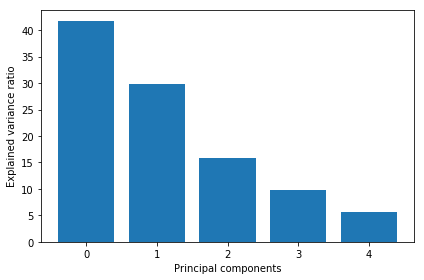

[32.8565079  27.60906993 17.53132452  8.57107194  6.81823802]


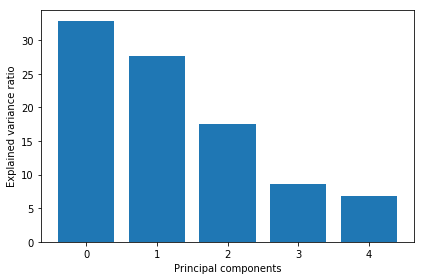

[28.4782577  22.85078598 15.70704289 12.17854763  5.56237288]


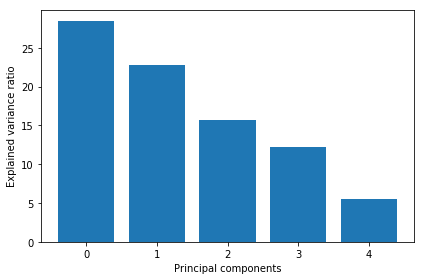

[50.60447554 33.82338849 15.94680482  7.34773382  6.6871019 ]


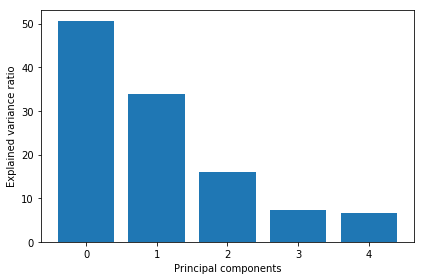

[35.05266824 25.0658537  18.9070654  15.59573856  6.85899529]


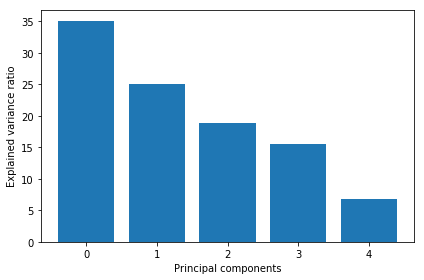

In [247]:
barplot(pca_1)
barplot(pca_2)
barplot(pca_3)
barplot(pca_4)
barplot(pca_5)

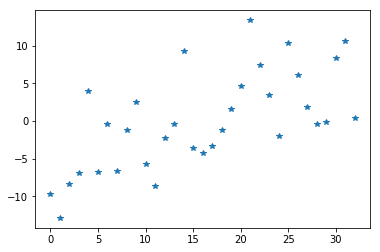

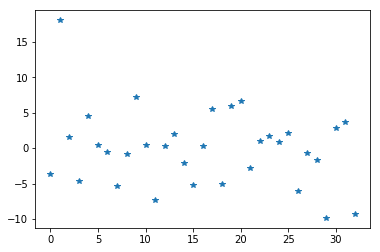

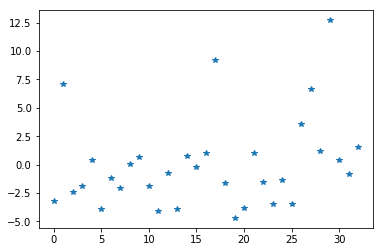

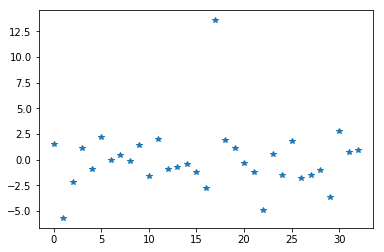

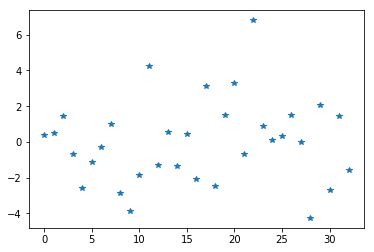

In [248]:
plt.plot(DF_pat1["principal component 1"],'*')
plt.show()
plt.plot(DF_pat1["principal component 2"],'*')
plt.show()
plt.plot(DF_pat1["principal component 3"],'*')
plt.show()
plt.plot(DF_pat1["principal component 4"],'*')
plt.show()
plt.plot(DF_pat1["principal component 5"],'*')
plt.show()

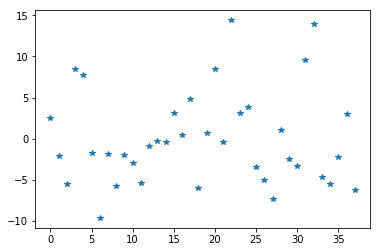

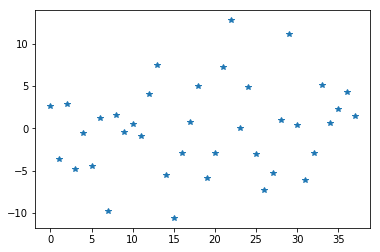

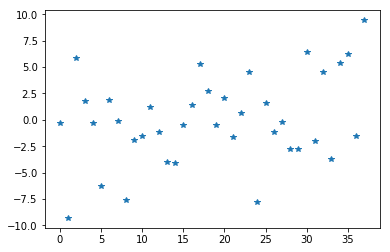

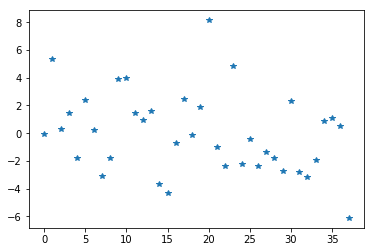

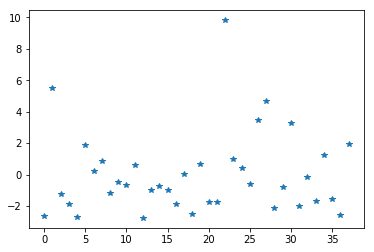

In [249]:
plt.plot(DF_pat2["principal component 1"],'*')
plt.show()
plt.plot(DF_pat2["principal component 2"],'*')
plt.show()
plt.plot(DF_pat2["principal component 3"],'*')
plt.show()
plt.plot(DF_pat2["principal component 4"],'*')
plt.show()
plt.plot(DF_pat2["principal component 5"],'*')
plt.show()

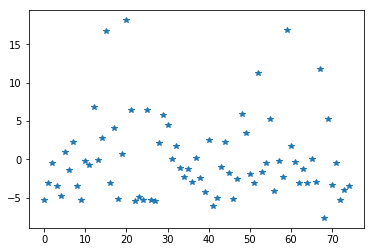

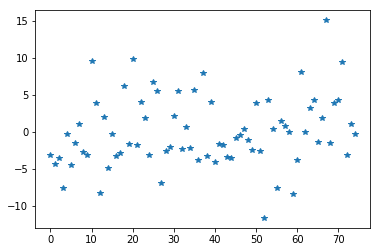

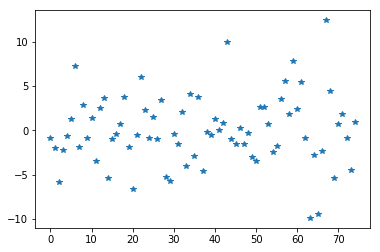

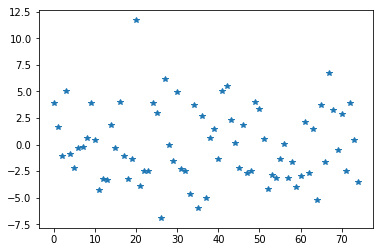

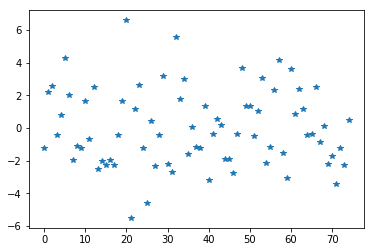

In [250]:
plt.plot(DF_pat3["principal component 1"],'*')
plt.show()
plt.plot(DF_pat3["principal component 2"],'*')
plt.show()
plt.plot(DF_pat3["principal component 3"],'*')
plt.show()
plt.plot(DF_pat3["principal component 4"],'*')
plt.show()
plt.plot(DF_pat3["principal component 5"],'*')
plt.show()

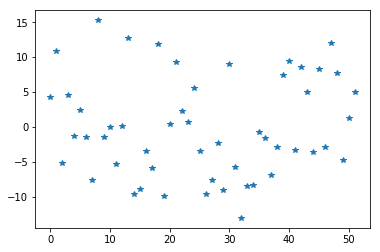

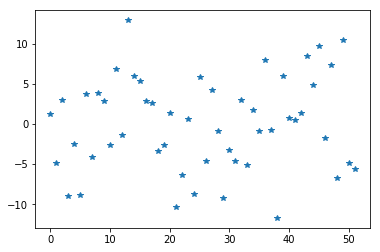

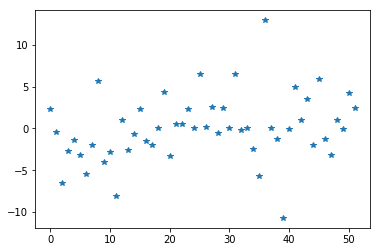

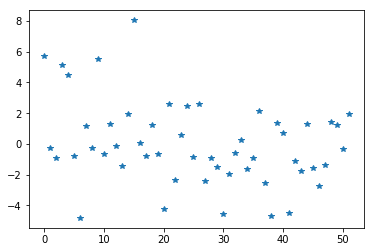

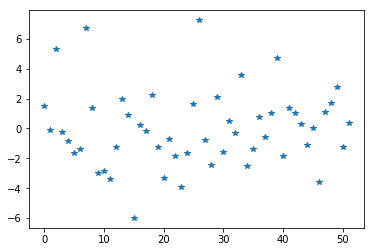

In [251]:
plt.plot(DF_pat4["principal component 1"],'*')
plt.show()
plt.plot(DF_pat4["principal component 2"],'*')
plt.show()
plt.plot(DF_pat4["principal component 3"],'*')
plt.show()
plt.plot(DF_pat4["principal component 4"],'*')
plt.show()
plt.plot(DF_pat4["principal component 5"],'*')
plt.show()

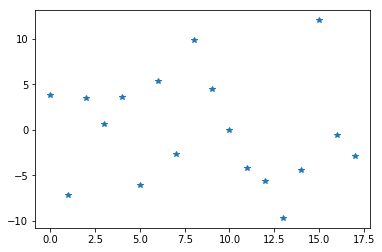

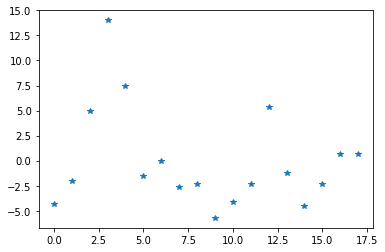

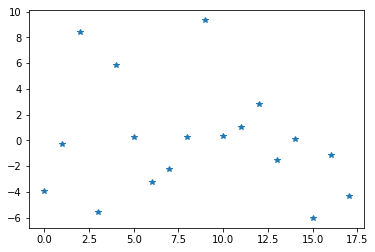

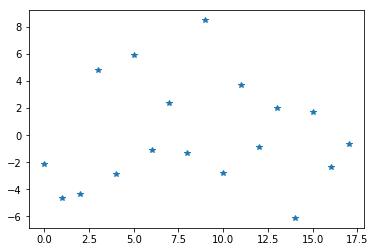

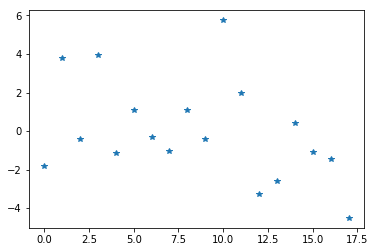

In [252]:
plt.plot(DF_pat5["principal component 1"],'*')
plt.show()
plt.plot(DF_pat5["principal component 2"],'*')
plt.show()
plt.plot(DF_pat5["principal component 3"],'*')
plt.show()
plt.plot(DF_pat5["principal component 4"],'*')
plt.show()
plt.plot(DF_pat5["principal component 5"],'*')
plt.show()